In [60]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [61]:
f = open(r'C:\Users\godsf\OneDrive\Desktop\Merisill\meriskill-Internship\Sales-Task\Sales Data.csv')
data = pd.read_csv(f)

In [62]:
data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [90]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.month
data['Hour'] = data['Order Date'].dt.hour

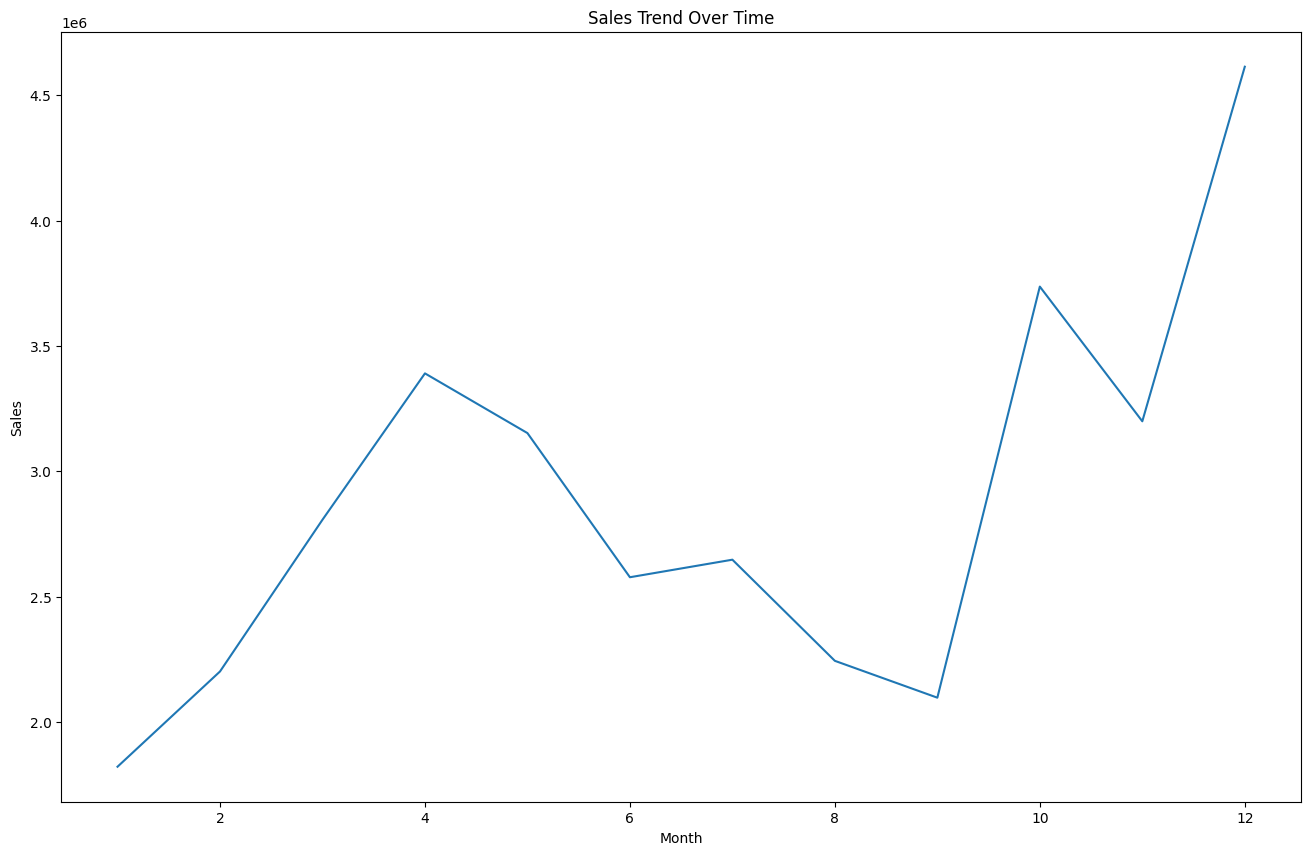

In [64]:
# Sales trend over time using the line chart
plt.figure(figsize=(16, 10))
Monthly_Sales = data.groupby('Month')['Sales'].sum()
sns.lineplot(x=Monthly_Sales.index, y=Monthly_Sales.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.show()

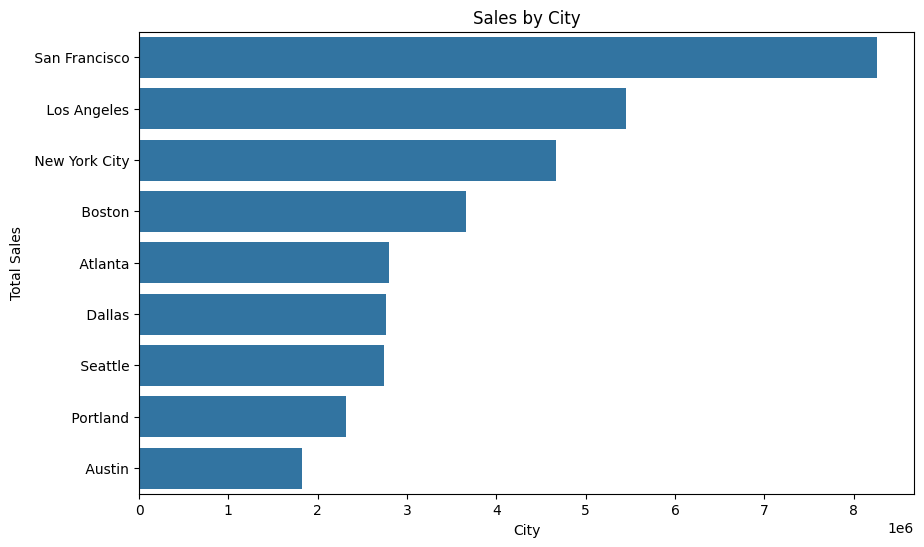

In [65]:
# Top 5 best selling product using stacked bar chart
City_sales = data.groupby('City')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=City_sales.values, y=City_sales.index, orient='h')
plt.ylabel('Total Sales')
plt.xlabel('City')
plt.title('Sales by City')
plt.show()

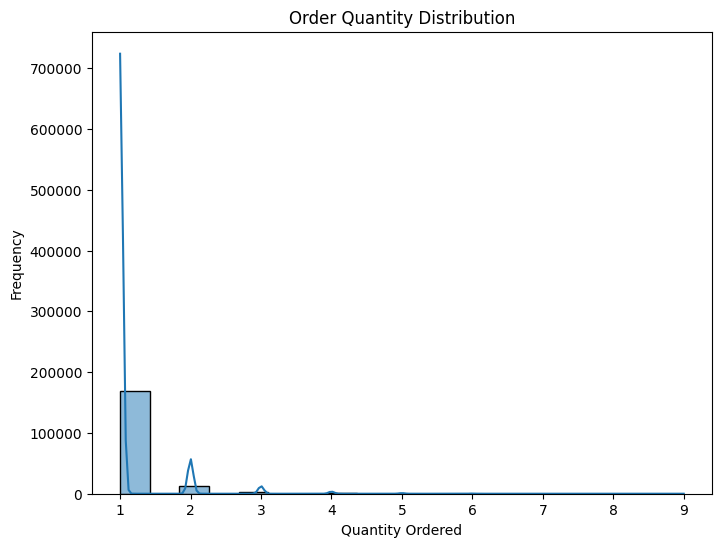

In [105]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Quantity Ordered'], kde=True)
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.title('Order Quantity Distribution')
plt.show()

C:\Users\godsf\AppData\Local\Temp\ipykernel_19780\2700865884.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\godsf\AppData\Local\Temp\ipykernel_19780\2700865884.py:5: UserWarning:

The palette list has more values (24) than needed (4), which may not be intended.



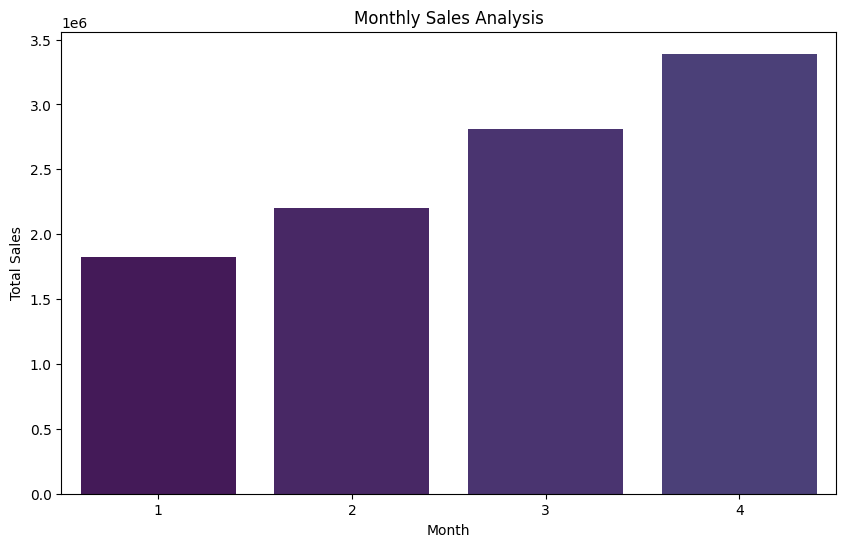

In [101]:
# Monthly sales analysis
monthly_sales = data.groupby('Month')['Sales'].sum().head(4)
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', len(hourly_orders))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette=colors)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Analysis')
plt.show()

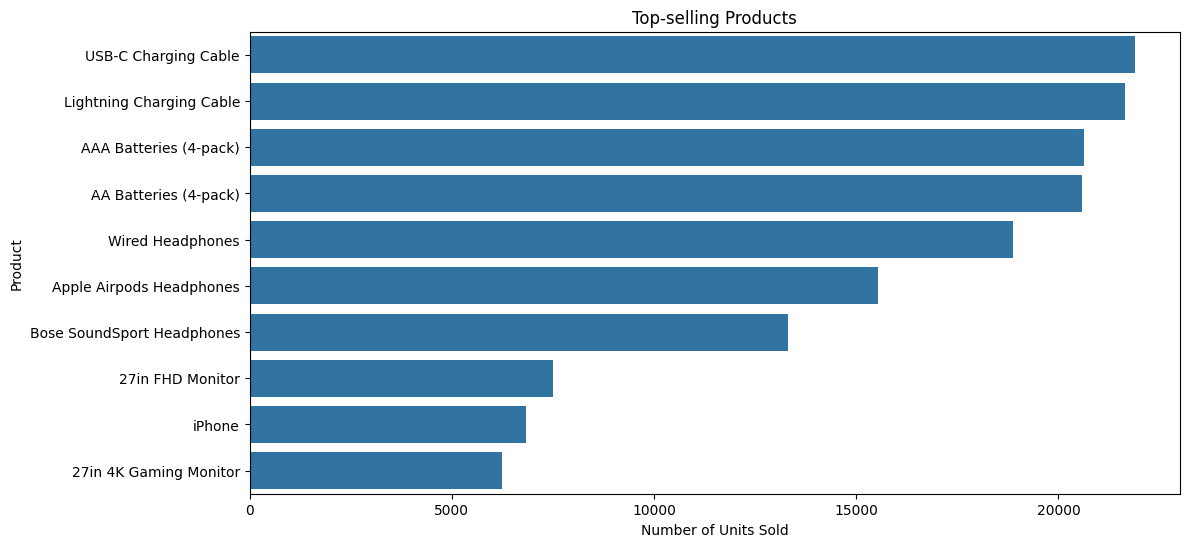

In [100]:
# Top-selling products
top_products = data['Product'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_products.index, x=top_products.values, orient='h')
plt.xlabel('Number of Units Sold')
plt.ylabel('Product')
plt.title('Top-selling Products')
plt.show()

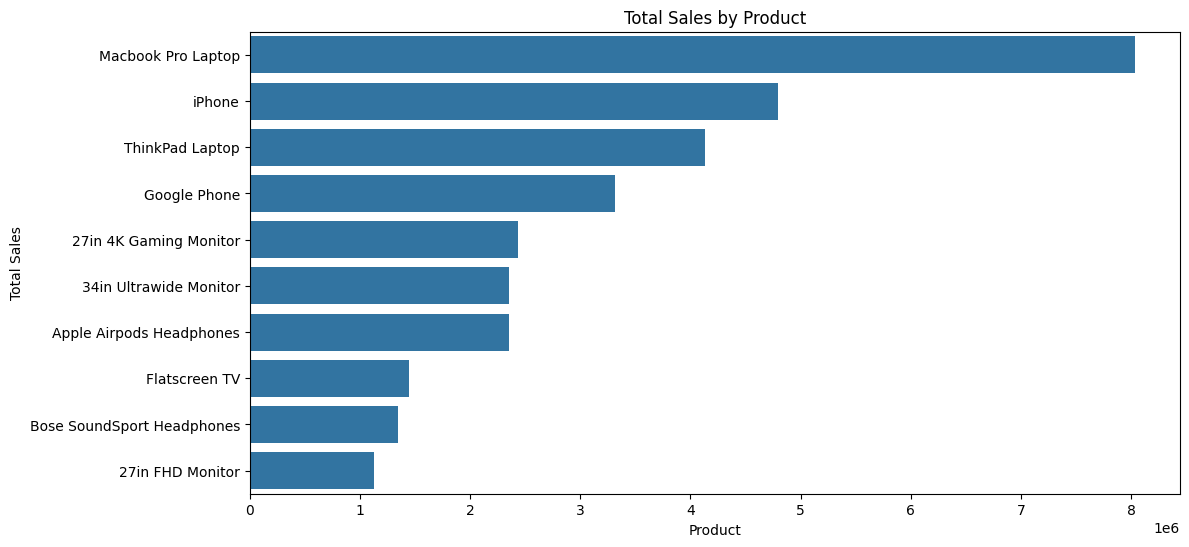

In [81]:
# Total revenue by product
product_revenue = data.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=product_revenue.values, y=product_revenue.index)
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')
plt.show()

C:\Users\godsf\AppData\Local\Temp\ipykernel_19780\3409086443.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




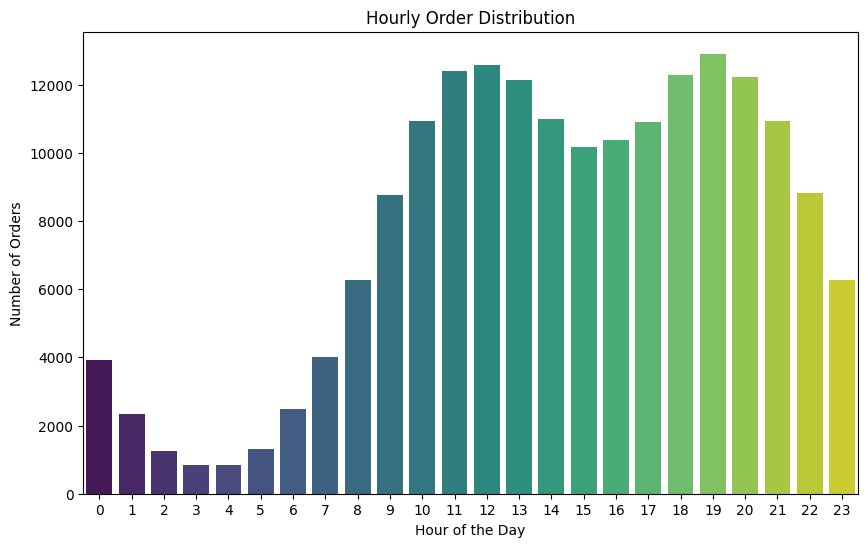

In [108]:
hourly_orders = data['Hour'].value_counts().sort_index()

colors = sns.color_palette('viridis', len(hourly_orders))

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette=colors)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Hourly Order Distribution')
plt.show()

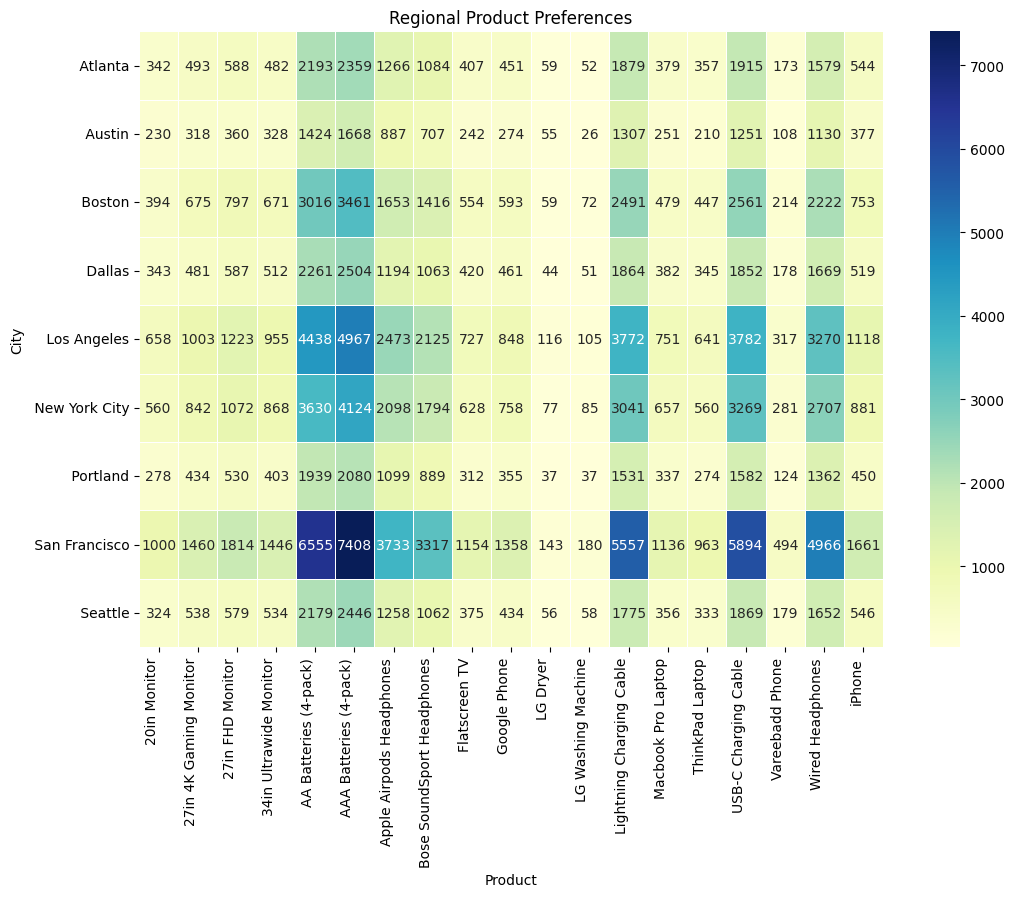

In [103]:
city_product_preferences = data.groupby(['City', 'Product'])['Quantity Ordered'].sum().reset_index()

product_preferences_pivot = city_product_preferences.pivot(index='City', columns='Product', values='Quantity Ordered')

plt.figure(figsize=(12, 8))
sns.heatmap(product_preferences_pivot, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Regional Product Preferences')
plt.xlabel('Product')
plt.ylabel('City')
plt.xticks(rotation=90, ha='right')
plt.show()

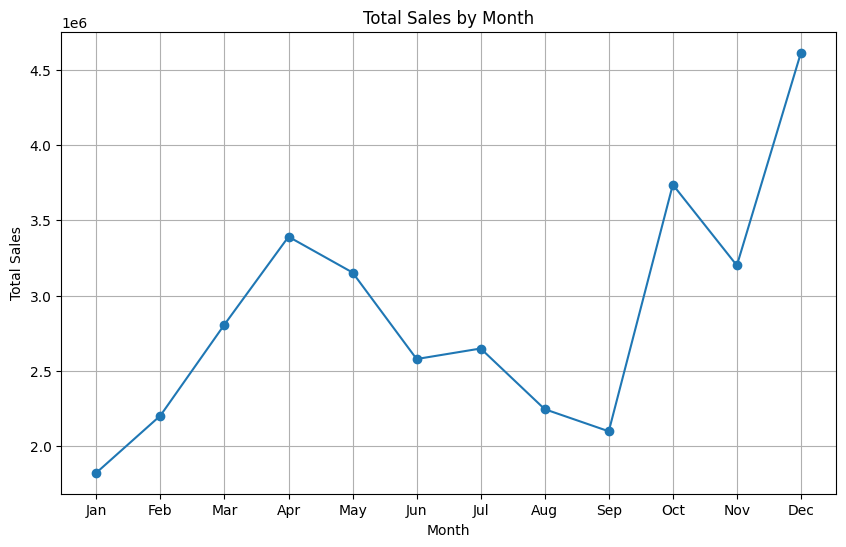

In [104]:
monthly_sales = data.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()